<a href="https://colab.research.google.com/github/JoaoCuri/pequenos_desafios/blob/master/metodos_hierarquicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clusterização hierarquica**

É um método não supervisionado que pode ser usado para prever agrupamentos baseados na distância entre observações. Assim como o blockspot é uma forma visual de identificar out layers, na clusterização hierárquica nós temos o que chamamos de "dendrograma".

É um gráfico em formato de árvore que distribui os seus dados com base na distância e nos permite encontrar subgrupos para a clusterização. 

Podemos usar a clusterização hierarquica:

1 - Gerenciamento de produtos hospitalares

2 - Linguágem genética

3 - Segmentação de usuário

4 - Análise de redes socias

Assim como o KMeans precisamos informar quantos centroides devemos usar, aí é que entra Dendograma.

Parametros importantes:

**Métricas de distancia**

Euclidiano

Manhattan

Cosseno

**Parametros de conexão**

Ward

Complete

Average

*Metodo de seleçao de parametros: tentativa e erro*

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score


In [15]:
np.set_printoptions(precision=4,suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [16]:
carros = pd.read_csv('https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv')
carros.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
X = carros[['mpg','disp','hp','wt']].values
y = carros['am'].values

**Usando o Scipy para gerar dendogramas**

In [18]:
Z = linkage(X,'ward')

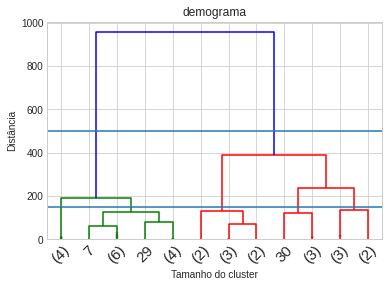

In [19]:
dendrogram(Z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)

plt.title('demograma')
plt.xlabel('Tamanho do cluster')
plt.ylabel('Distância')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()


**Gerando Clusters hiráquicos**

In [21]:
k = 2
hclusters = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward').fit(X)
accuracy_score(y,hclusters.labels_)

0.78125

In [22]:
k = 2
hclusters = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward').fit(X)
accuracy_score(y,hclusters.labels_)

0.78125

In [23]:
k = 2
hclusters = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete').fit(X)
accuracy_score(y,hclusters.labels_)

0.4375

In [24]:
k = 2
hclusters = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average').fit(X)
accuracy_score(y,hclusters.labels_)

0.78125

In [25]:
k = 2
hclusters = AgglomerativeClustering(n_clusters=k,affinity='manhattan',linkage='average').fit(X)
accuracy_score(y,hclusters.labels_)

0.71875

testar sempre para encontar a que melhor funciona com os seus dados.